In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import json
import numpy as np


In [3]:
def extractData(df):
    train, test = train_test_split(df, test_size=0.2, stratify=df["Output"], shuffle=True)
    xTrain = train.drop(columns = ["Output"]).to_numpy()
    xTest = test.drop(columns = ["Output"]).to_numpy()
    yTrain = train["Output"].to_numpy()
    yTest = test["Output"].to_numpy()
    return xTrain, yTrain, xTest, yTest

In [4]:
file = open("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/Models/wordEmbeddings.json")
dict = json.load(file)

os.chdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/InvoiceDateDataset")
datasets = os.listdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/InvoiceDateDataset")

dfs = []
for file in datasets:
    df = pd.read_csv(file)
    dfs.append(df)

DF = pd.concat(dfs)

IDdropCols = []
for col in dict.keys():
    if DF[col].max()==0 and DF[col].min()==0:
        IDdropCols.append(col)
        IDdropCols.append(col+"_X")
        IDdropCols.append(col+"_Y")

DF.drop(columns=IDdropCols, inplace=True)

In [5]:
file = open("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/Models/IDVocab.json")
IDVocab = json.load(file)
print("ID : ", sum(IDVocab.values()))

ID :  799


In [6]:
os.chdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/InvoiceDateDataset")
datasetDir = os.listdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/InvoiceDateDataset")

In [8]:
dfs = []
for file in datasetDir:
    df = pd.read_csv(file)
    dfs.append(df)
data = pd.concat(dfs)
data.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2", "Unnamed: 0.3", "Unnamed: 0.4", "Unnamed: 0.5", "Unnamed: 0.6", "text", "Similarity", "Class", "CandidatePosition"], inplace=True)
data.drop(columns=IDdropCols, inplace=True)

data

,x1,y1,x2,y2,invoice,invoice_X,invoice_Y,pitstop,pitstop_X,pitstop_Y,...,touchstone,touchstone_X,touchstone_Y,mre,mre_X,mre_Y,offi,offi_X,offi_Y,Output
0,0.132269,0.230242,0.203820,0.244355,0.000000,0.000000,0.000000,-0.005783,0.082668,0.091734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.136830,0.254032,0.208381,0.268145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.890821,0.277823,0.962372,0.291935,-0.038794,0.104475,0.000403,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.136830,0.254032,0.208381,0.268145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.890821,0.277823,0.962372,0.291935,-0.038794,0.104475,0.000403,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.235649,0.373962,0.287024,0.399738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
0,0.744252,0.060217,0.817265,0.069064,-0.038794,0.188584,0.022546,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
0,0.485691,0.086684,0.503426,0.093242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016255,0.142483,0.019105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.296252,0.160251,0.366385,0.169376,-0.038794,0.235389,0.000570,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.021265,0.219468,0.066581,0.020392,0.168480,0.059453,1


In [9]:
data.drop_duplicates(keep="first", inplace=True)
data.reset_index(inplace=True)
data.drop(columns=["index"], inplace=True)
data

/tmp/ipykernel_9670/3802001468.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.reset_index(inplace=True)


,x1,y1,x2,y2,invoice,invoice_X,invoice_Y,pitstop,pitstop_X,pitstop_Y,...,touchstone,touchstone_X,touchstone_Y,mre,mre_X,mre_Y,offi,offi_X,offi_Y,Output
0,0.132269,0.230242,0.203820,0.244355,0.000000,0.000000,0.000000,-0.005783,0.082668,0.091734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.136830,0.254032,0.208381,0.268145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.890821,0.277823,0.962372,0.291935,-0.038794,0.104475,0.000403,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.687843,0.070776,0.754510,0.079909,-0.038794,0.230980,0.019406,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.535686,0.127854,0.602353,0.136416,-0.038794,0.078824,0.076199,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.235649,0.373962,0.287024,0.399738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
256,0.744252,0.060217,0.817265,0.069064,-0.038794,0.188584,0.022546,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
257,0.485691,0.086684,0.503426,0.093242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016255,0.142483,0.019105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
258,0.296252,0.160251,0.366385,0.169376,-0.038794,0.235389,0.000570,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.021265,0.219468,0.066581,0.020392,0.168480,0.059453,1


In [10]:
data.isna().sum().sum()

0

In [11]:
data["Output"] = pd.to_numeric(data["Output"], errors='coerce')

In [12]:
file = open("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/Models/wordEmbeddings.json")
dict = json.load(file)
cols = dict.keys()
cols

dict_keys(['invoice', 'pitstop', 'order', 'id', 'service', 'date', 'delivery', 'registration', 'number', 'renault', 'pulse', 'diesel', 'odometer', 'from', 'to', 'cars', 'care', 'opp', 'trident', 'hyundai', 'showroom', 'kudlu', 'gate', 'hosur', 'main', 'road', 'bengaluru', 'gst', 'bumper', 'bracket', 'front', 'ac', 'repair', 'evaporator', 'cleaning', 'painting', 'charges', 'full', 'body', 'page', 'tax', 'enterprises', 'no', 'dated', 'near', 'rotery', 'community', 'center', 'dec', 'vikas', 'nagar', 'bundi', 'raj', 'note', 'of', 'payment', 'state', 'name', 'rajasthan', 'code', 'reference', 'other', 'references', 'dt', 'buyer', 'bill', 'tally', 'solutions', 'private', 'limited', 'amr', 'tech', 'park', 'ii', 'hongasandra', 'dispatch', 'doc', 'banglore', 'dispatched', 'through', 'destination', 'karnataka', 'terms', 'si', 'description', 'goods', 'quantity', 'rate', 'per', 'amount', 're', 'om', 'bussiness', 'promotional', 'activity', 'influencer', 'event', 'igst', 'total', 'chargeable', 'in', 

In [14]:
corrs = {}
for col in cols:
    if col in data.columns:
        c = data[col].corr(data["Output"])
        corrs[col] = abs(c)

corrs = sorted(corrs.items(), key=lambda x:x[1], reverse=True)

corrs

[('invoice', 0.3145443186387803),
 ('dated', 0.23633087442609255),
 ('tax', 0.1892136501922602),
 ('gstin', 0.16175780109620466),
 ('amount', 0.13971704197766446),
 ('in', 0.1254665566178001),
 ('rate', 0.12052119416626726),
 ('due', 0.11564379108696102),
 ('hobli', 0.11227950403030727),
 ('voucher', 0.1122795040303071),
 ('voice', 0.11227950403030695),
 ('diamond', 0.11227950403030691),
 ('devarabeesanahalli', 0.11227950403030687),
 ('varthur', 0.1122795040303066),
 ('technology', 0.11227950403030659),
 ('duplicate', 0.11227950403030655),
 ('income', 0.11227950403030654),
 ('ltd', 0.11171382132409319),
 ('we', 0.10980435652435735),
 ('on', 0.10980435652435731),
 ('travel', 0.1098043565243573),
 ('name', 0.10746738951937644),
 ('po', 0.0980199941576124),
 ('cgst', 0.09801999415761237),
 ('this', 0.09801999415761231),
 ('description', 0.09699055930194625),
 ('original', 0.09504969130435151),
 ('tower', 0.09504969130435138),
 ('karnataka', 0.09029720673913377),
 ('company', 0.08961648652

In [15]:
len(data[data["Output"]==1])

99

In [16]:
len(data[data["Output"]==0])

161

In [17]:
xTrain, yTrain, xTest, yTest = extractData(data)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(xTrain, yTrain)

In [18]:
X_train_resampled.shape

(258, 2401)

In [54]:
len(y_train_resampled[y_train_resampled==1])

129

In [55]:
len(y_train_resampled[y_train_resampled==0])

129

In [62]:
xgb = XGBClassifier(objective = "binary:hinge", eval_metric = "error", n_estimators = 500, max_depth = 10, num_parallel_tree = 7, learning_rate = 0.09)
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=7,
              objective='binary:hinge', predictor=None, ...)

In [63]:
pred = xgb.predict(xTest)

In [64]:
cm = confusion_matrix(pred, yTest)
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
totalP = TP+FP
totalN = TN+FN
total = totalP+totalN

acc = (TP+TN)/(totalN+totalP)
acc*=100

p = TP/(TP+FP)
r = TP/(TP+FN)
f1 = (2*p*r)/(p+r)

print("Total : ", total, "\n")
print("True +ve :  ", TP, "     ", "{:.2f}".format((TP/totalP)*100), "%")
print("True -ve :  ", TN, "     " ,"{:.2f}".format((TN/totalN)*100), "%")
print("False +ve : ", FP, "      ", "{:.2f}".format((FP/totalP)*100), "%")
print("False -ve   ", FN, "      ", "{:.2f}".format((FN/totalN)*100), "%")
print("\n")
print("Accuracy :  ", "{:.2f}".format(acc), "%")
print("\n")
print("F1 Score :  ", "{:.2f}".format(f1), "%")


Total :  52 

True +ve :   24       75.00 %
True -ve :   11       55.00 %
False +ve :  8        25.00 %
False -ve    9        45.00 %


Accuracy :   67.31 %


F1 Score :   0.74 %


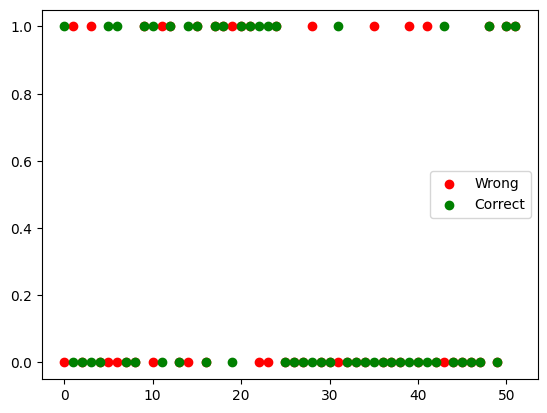

In [33]:
x = [x for x in range(len(xTest))]
plt.scatter(x, pred, color="red")
plt.scatter(x, yTest, color="green")
plt.legend(["Wrong", "Correct"])
plt.show()

In [65]:
# params = {
#     "n_estimators" : [300, 400, 500],
#     "max_depth" : [9, 10, 11],
#     "learning_rate" : [0.08, 0.09, 0.1, 0.15],
#     "num_parallel_tree" : [6, 7, 8, 9] ,
#     "reg_alpha" : [1.3, 1.5, 1.7],
#     "reg_lambda" : [1.1, 1.3, 1.5]
# }

params = {
    "n_estimators" : [200, 300, 400, 1000],
    "max_depth" : [10, 11, 12],
    "learning_rate" : [0.09, 0.1, 0.2, 0.4],
    "num_parallel_tree" : [8, 9, 10],
    "reg_alpha" : [1.6, 1.7, 1.8],
    "reg_lambda" : [1.2, 1.3, 1.4]
}

# params = {
#     "n_estimators" : [500],
#     "max_depth" : [1, 5],
#     "learning_rate" : [0.03, 0.1],
#     "num_parallel_tree" : [5],
#     "reg_alpha" : [1.5],
#     "reg_lambda" : [1.9]
# }

In [66]:
gridXGB = RandomizedSearchCV(xgb, params, n_jobs=-1, scoring="f1", n_iter=20, cv=5)
gridXGB.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='error',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_r...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=500, n_jobs=None,
                                           num_parallel_tree=7,
                                           objective='binary:hinge',
                                           predictor=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.09, 0.1, 0.2, 0.4],
                                        'max_depth': [10, 11, 12],
                                        'n_estimators': [200, 300, 400, 1000],
                                        'num_parallel_tree': [8, 9, 10],
                                        'reg_alpha': [1.6, 1.7, 1.8],
                                        'reg_lambda': [1.2, 1.3, 1.4]},
                   scoring='f1')

In [67]:
bestParams = gridXGB.best_params_
bestParams

{'reg_lambda': 1.4,
 'reg_alpha': 1.6,
 'num_parallel_tree': 8,
 'n_estimators': 400,
 'max_depth': 12,
 'learning_rate': 0.09}

In [68]:
bestModel = gridXGB.best_estimator_

In [69]:
yPred = bestModel.predict(xTest)

In [70]:
cm = confusion_matrix(yPred, yTest)
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
totalP = TP+FP
totalN = TN+FN
total = totalN + totalP

acc = (TP+TN)/(totalN+totalP)
acc*=100

p = TP/(TP+FP)
r = TP/(TP+FN)
f1 = (2*p*r)/(p+r)

print("Total : ", total, "\n")
print("True +ve :  ", TP, "     ", "{:.2f}".format((TP/totalP)*100), "%")
print("True -ve :  ", TN, "     " ,"{:.2f}".format((TN/totalN)*100), "%")
print("False +ve : ", FP, "      ", "{:.2f}".format((FP/totalP)*100), "%")
print("False -ve   ", FN, "      ", "{:.2f}".format((FN/totalN)*100), "%")
print("\n")
print("Accuracy :  ", "{:.2f}".format(acc), "%")
print("\n")
print("F1 Score :  ", "{:.2f}".format(f1))



Total :  52 

True +ve :   27       84.38 %
True -ve :   8       40.00 %
False +ve :  5        15.62 %
False -ve    12        60.00 %


Accuracy :   67.31 %


F1 Score :   0.76


In [53]:
bestModel.save_model("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Models/XGBoostModelID")